# view the multiome data, see if it's good

In [1]:
import pyBigWig
import matplotlib.pyplot as plt
import numpy as np
bw_path = '/data1/lesliec/jiaxin/PANC/results/ChromBPNet/Oct_celltype_specific/DE_50k_peaks/auxiliary/data_unstranded.bw'
bw = pyBigWig.open(bw_path)
chroms = bw.chroms()
chroms

{'chr1': 248956422,
 'chr10': 133797422,
 'chr11': 135086622,
 'chr12': 133275309,
 'chr13': 114364328,
 'chr14': 107043718,
 'chr15': 101991189,
 'chr16': 90338345,
 'chr17': 83257441,
 'chr18': 80373285,
 'chr19': 58617616,
 'chr2': 242193529,
 'chr20': 64444167,
 'chr21': 46709983,
 'chr22': 50818468,
 'chr3': 198295559,
 'chr4': 190214555,
 'chr5': 181538259,
 'chr6': 170805979,
 'chr7': 159345973,
 'chr8': 145138636,
 'chr9': 138394717,
 'chrX': 156040895,
 'chrY': 57227415}

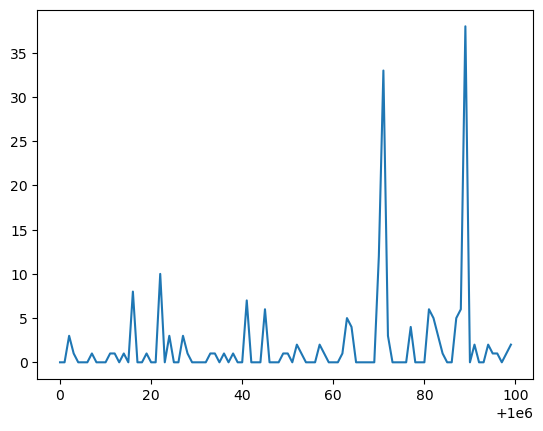

In [6]:
start = 1000000
end = 1000100
values = bw.values('chr1', start, end)
values = np.nan_to_num(values)
plt.plot(range(start, end), values)

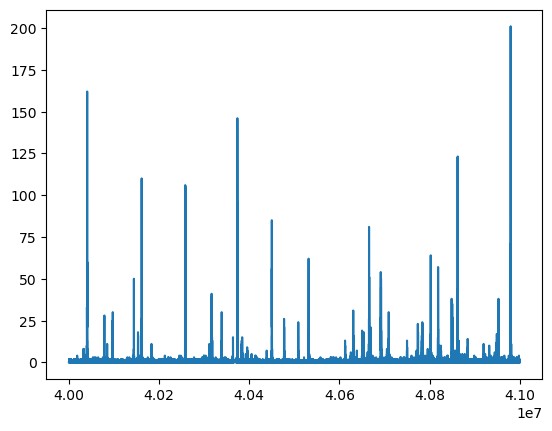

In [7]:
#looks fine? let's see some of the ones that we have in alpha genome to compare

start = 40_000_000
end = int(start + 1e6)
values = bw.values('chr1', start, end)
values = np.nan_to_num(values)
plt.plot(range(start, end), values)

In [1]:
import pandas as pd
seqs = pd.read_csv('/data1/lesliec/sarthak/data/DK_zarr/sequences_enformer.bed', header=None, sep='\t')
seqs = seqs[seqs[3] == 'test'].reset_index(drop=True)
seqs

,0,1,2,3
0,chr10,37555537,37686609,test
1,chr14,87048845,87179917,test
2,chrX,136527085,136658157,test
3,chr11,34042349,34173421,test
4,chr19,10352757,10483829,test
...,...,...,...,...
1932,chr19,33204702,33335774,test
1933,chr14,41861379,41992451,test
1934,chr19,30681544,30812616,test
1935,chr14,61473198,61604270,test


In [3]:
seqs.iloc[10]

0       chr14
1    97944300
2    98075372
3        test
Name: 10, dtype: object

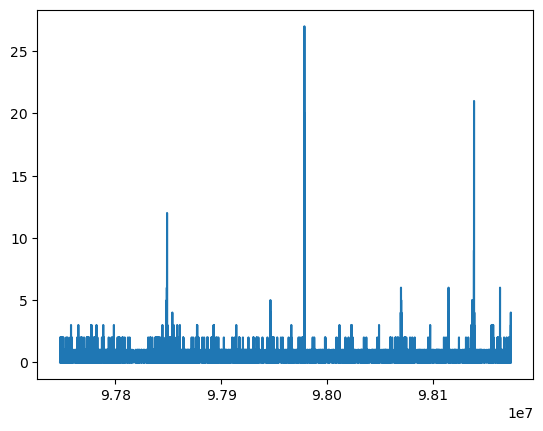

In [5]:
chrom = 'chr14'
start = 97944300
end = 98075372
#extend start and stop so length is 524288
start = start - (524288 - (end - start)) // 2
end = end + (524288 - (end - start)) // 2
values = bw.values(chrom, start, end)
values = np.nan_to_num(values)
plt.plot(range(start, end), values)

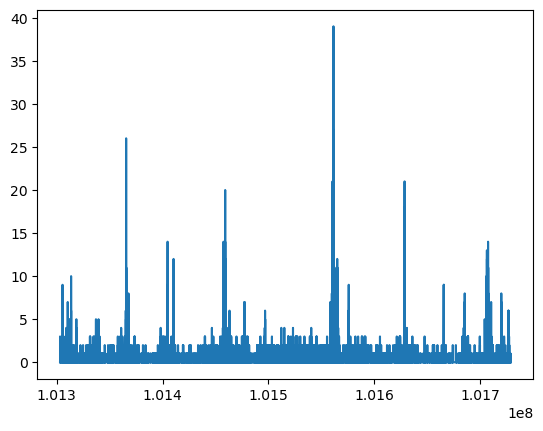

In [6]:
#ok this was a peak, but is not in this cell type, let's check some other locations
chrom,start,end,_ = seqs.iloc[15]
#extend start and stop so length is 524288
start = start - (524288 - (end - start)) // 2
end = end + (524288 - (end - start)) // 2   
values = bw.values(chrom, start, end)
values = np.nan_to_num(values)
plt.plot(range(start, end), values)

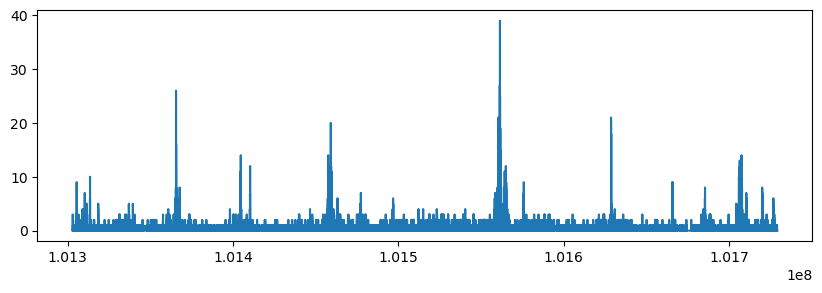

In [ ]:
#ok seems fine, let's also make the figure 10x3 size
plt.figure(figsize=(10,3))
plt.plot(range(start, end), values)

In [ ]:
#this cell is super slow for some reason? idk why
total = 0
for chrom in chroms:
    print(chrom)
    total += sum(np.nan_to_num(bw.values(chrom, 0, chroms[chrom])))

chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18


In [ ]:
#